# Logistic Regression with Python
by Rohan Rajendra
Lets perform Regression with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 
Kaggle provides many different datasets to work with, This is a very famous data set and very often used to perform machine learning for Learning how regression works! 

Regression comes under Supervised Learning in which output (y)  is known and it is Numeric output, If it is non-numeric them we perform Classification. 

We'll be trying to predict a classification - survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning like removing outliers , balancing data and nutrilizing null values etc.

## Import Libraries
Let's import some libraries to get started!

In [2]:
#importing library files necessary for perfroming the Project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Set
Getting the Dataset from kaggle or downloaded files in csv format.

In [6]:
train=pd.read_csv('../input/titanic/titanic_train.csv') # Here we have imported the dataset file

In [7]:
# Reading the First 5 rows and all columns
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


so here we need to Predict the Data of weather or not the clinet has survived or not survived ( yes or no ) 

## Lets Start with Basic EDA- Exploratory Data Analysis
Remember there will be many methods and Cleaning Strategies , here im using only some for time being, If the data is clean we get accurate output and its better to make is clean as possible.

## Missing Data or null data 

In [9]:
#Lets see how many rows have null values 
train.isnull() 
# we can obseve some True values which are Null specially in Cabin we have more na values. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

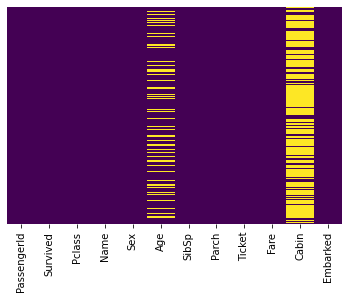

In [14]:
#here we have 891 rows and 12 Columns.
#Lets see through HeatMap  - the condition will be visualized into another color.
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# yticklabels will no be displayed - yaxis will not be displayed
# cbar will not be displayed because it is not necessaary 
# cmap color is viridis we can use many combination of colors like rainbow etc..
#here we can see that Age and Cabin has most of the Null values (Yellow color).

Guessing 35 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

<AxesSubplot:xlabel='Survived', ylabel='count'>

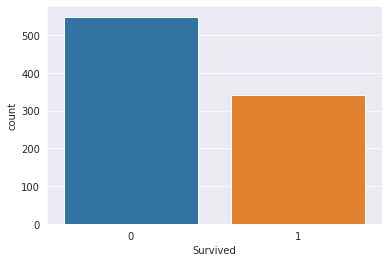

In [16]:
#Lets Visualize the data to know more about this data
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=train)
# here 0 is dead and 1 is survived 

The above grapg gives us the details of how many has not survived and survived
we can observe that many did not make it or did not survive
and only few or little more than 1/2 people have survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

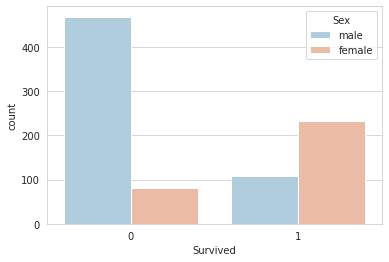

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train, palette='RdBu_r')

By this outplut we can conclude that only few have survived and many have not made it and also more men have not survived compared to female, only 1/2 of men have survived compared to men , i guess or most likely the captains and ship workers helped woman to get into safety boats than helping men. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

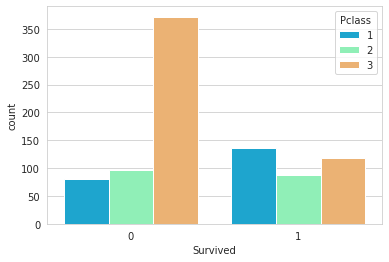

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

Here we can observe that most of the 3rd class people have been dead or not survived and VIP's have been saved and most 1st class people have been put into the boat or escaped death.
i guess the ship workers and captain ordered to save VIP pr 1st class Pacengers to get into Safety Boats because they are important for society or thier country.

<AxesSubplot:xlabel='Age'>

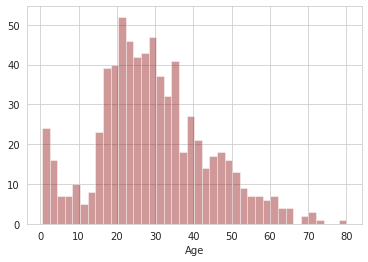

In [25]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)
#distplot gives histogram of different distribution
#Here we are visualizing for Age or the People in complete dataset
# kde shows the desity and distribution line across the data.

We can observe that most of the data tells that people of age 18 to 35 are more, and also includes children on age less than 1 or 2 years old so we can assume that most of them were couples or newly married people.
age 40 is also more so we can assume that these were business man travelling to another place or just trying out the ship.

<AxesSubplot:>

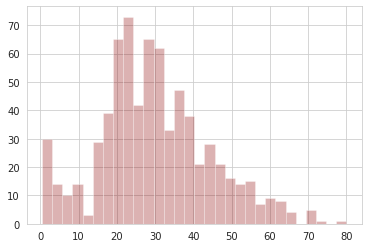

In [26]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)
# we can also use matplotlib function of Hist or histogram function 


<AxesSubplot:xlabel='SibSp', ylabel='count'>

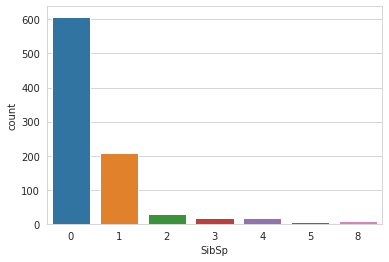

In [27]:
# lets use countpolot to see more details
sns.countplot(x='SibSp',data=train)
#SibSp is Siblings or Spows or children

Many didnt have siblings or spows as we can see that 0 or blue is more. 

<AxesSubplot:>

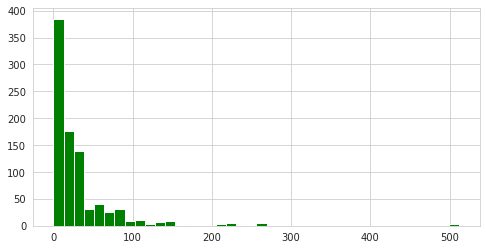

In [28]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

We can see that the fair of the train data is more 

# Cufflinks for plots

In [30]:
import cufflinks as cf
cf.go_offline()

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



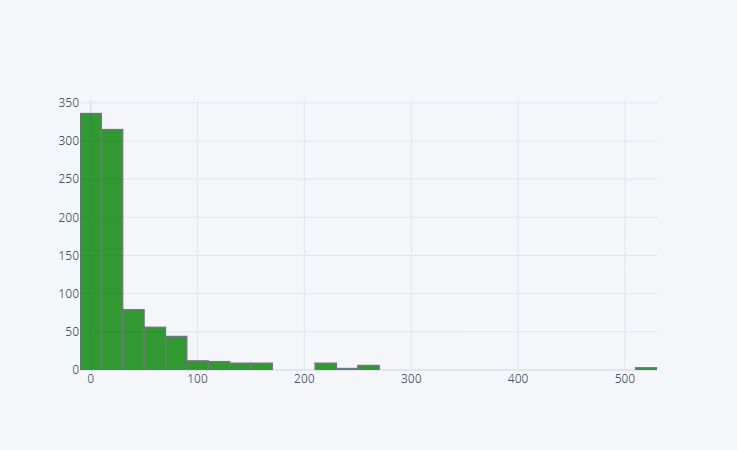

In [31]:
train['Fare'].iplot(kind='hist',bins=30,color='green') # similar to histogram.

# Data Cleaning 
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

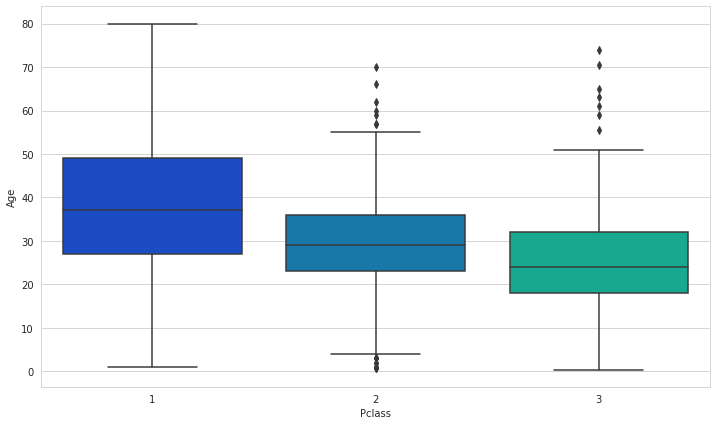

In [33]:
plt.figure(figsize=(12,7)) # this gives us the ability to resize or Size of the graph.
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
#we are doing boxplot for 

Here we can observe that the 3rd class people are people who are young( 18-32 and compared to 2nd and 3rd class and 1st class people are not young and are age of 28 to 50. 
We can also observe Outliers in the data or some extremen values.

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age

In [34]:
# Creating User defined Class to replace null values bases on the age and Pclass.
def impute_age(cols): # defining a function 
    Age=cols[0]       # Creating the variable with index 0 as Age
    Pclass=cols[1]    # Creating the variable with index 1 as Pcalss
    # this is to read the Data input in that format or [0,1]-index.
    
    if pd.isnull(Age):
        # this is the condition if condition satisifies then it returns approx age.
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 28
        else:
            return 23
        
    else:
        return Age
        

In [35]:
# Now applying the User Defined Function to the data
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

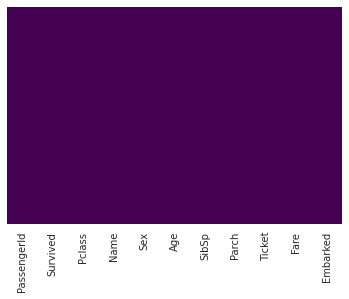

In [40]:
# Now lets Check the data using Heatmap again.
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

 Here we have completely Cleared null values from the Age column.

In [39]:
# now lets Remove the Cabin Column becuse it has most of the data lost or missing
train.drop('Cabin',axis=1,inplace=True)
#now rerun the previous heatmap, and check the heatmap for yellow lines we might not find it.

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features 
Non numeric data to numeric data so that our machine will understand.
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.
The Machine Learning Algorithm only understands the data that are in numeric format for Regression.

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [43]:
# mostly objects should be converted to numeric or binary data.
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Here we have converted Embark column to binary representation and used drop first = true it removes the first column hence reducting the column so it also gives us the accurate result if not removed or removed.

In [45]:
# dummy variable creation for other columns 
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
#We can also convert all the columns by using single row function or  by multiple variable 

In [49]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
# Lets remove the perticular column to see the other numeric columns.

KeyError: "['Sex' 'Embarked' 'Name' 'Ticket'] not found in axis"

In [48]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


Here we observe that all the columns contain numeric values and now lets add back all the values that are converted into one single set of data to perform ML.

In [50]:
train = pd.concat([train,sex,embark],axis=1)
#here pd.concat joins all the columns together.

In [51]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now our Data is Completely ready to perform the ML algorithm - Regression.

Here output Known Variable is Survived , or we need to find the accuracy of training as output Survived.
Survived is the Value that we need to Jurge or get as output therefore lets remove it.
because we need to check it in Test.



In [53]:
train.drop(['Survived'],axis=1).head() # here .head() also displays the final top 5 rows.
# this function drops the column and displays the head() or first 5 rows.

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [58]:
from sklearn.model_selection import train_test_split
# This SKLearn library file  is used to divide thee data set into 2 train & test. 

In [61]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)
# We have divied the data for training to predict Survived.
# into 30% test and 70% train. 


# Training and Predicting using Logistic Regression 

In [62]:
# using Library file of logisitc Regression from sklearn.linear_miodel
from sklearn.linear_model import LogisticRegression

In [65]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
# here we are using x train and y train for training.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [66]:
predictions=logmodel.predict(x_test)

In [70]:
from sklearn.metrics import confusion_matrix # Confusion matric is mostly used for checking the accuracy 
#confusion materx shows us TT,TF,FF,FT values. so we can jurge the accuracy.

In [71]:
accuracy=confusion_matrix(y_test,predictions)

In [72]:
accuracy

array([[134,  20],
       [ 42,  72]])

In [75]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7686567164179104

So here the Accuracy is around 76% so it jurges or predicts 76 percent. 

In [74]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

# Evaluation

We can check precision,recall,f1-score using classification report !

In [79]:
# Classification report can gives us some insights about the accuracy of the data prediction.


In [80]:
from sklearn.metrics import classification_report 


In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       154
           1       0.78      0.63      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268



These whole analysis and model building was reffered from Krish nayar channel and i also added extra information and methods. 
There are many methods to build the model and we can use different machine leraning models apart from logisticRegresion.
WE can also extract extra insights , please let me know if you have any other mothds and ill learn too.
Thank you!
Rohan Rajendra. 
r.rohanrajendra@gmail.com
7975870924
